In [5]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.ticker
from matplotlib import cm 
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from fractions import Fraction
from scipy.optimize import basinhopping
from scipy.optimize import minimize
import pyswarms as ps
from pyswarms.single.global_best import GlobalBestPSO
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import torch.nn.functional as F

In [1]:
def fun(x: list) -> float:
    return (x[0]**2 + 10*(x[1]**2)) / 2
    
def grad(x: list) -> float:
    return np.array([float(x[0]), float(10*x[1])]) 

In [2]:
def min_gd_i(fun, x0, grad): 
    alpha = 0.3
    beta = 0.8
    dx = -grad(x0)
    mylist = []
    while (np.max(np.abs(dx)) > 1.e-7):
        t = 1
        while fun(x0+t*dx) > fun(x0) - alpha*t*dx.T@dx:
            t *= beta
        mylist.append(float(x0[0]**2 + 10*(x0[1]**2) / 2))
        x0 = x0 + t*dx
        dx = -grad(x0)      
    return mylist

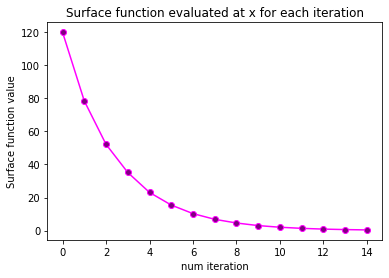

In [6]:
var = min_gd_i(fun, [10,2], grad) 
plt.plot(var[0:15], color='magenta', marker='o',mfc='purple')
plt.ylabel('Surface function value') 
plt.xlabel('num iteration') 
plt.title("Surface function evaluated at x for each iteration") 
plt.show() 

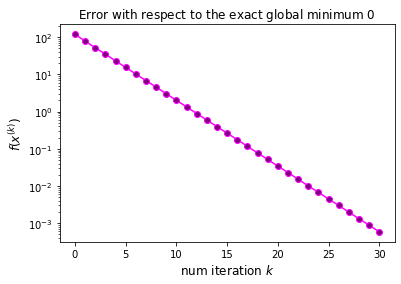

In [7]:
plt.plot(var[:31], color='magenta', marker='o',mfc='purple')
plt.ylabel(r"$f(x^{(k)})$", fontsize=12) 
plt.xlabel(r'num iteration $k$', fontsize=12) 
plt.title(r'Error with respect to the exact global minimum $0$')
plt.yscale('log')
plt.show()  

In [8]:
def min_gd_ii(fun, x0, grad):
    alpha = 0.3
    beta = 0.8
    dx = -grad(x0)
    while (np.max(np.abs(dx)) > 1e-07):
        t = 1
        while fun(x0+t*dx) > fun(x0) - alpha*t*dx.T@dx:
            t *= beta
        x0 = x0 + t*dx
        dx = -grad(x0)   
    return list(x0)

In [9]:
def min_gd_iii(fun, x0, grad):
    alpha = 0.3
    beta = 0.8
    dx = -grad(x0)
    minsequencelist = []
    while (np.max(np.abs(dx)) > 1e-07):
        t = 1
        while fun(x0+t*dx) > fun(x0) - alpha*t*dx.T@dx:
            t *= beta
        minsequencelist.append(list(x0))
        x0 = x0 + t*dx
        dx = -grad(x0)  
    minsequencelist.append(list(x0))
    return(minsequencelist)

In [11]:
def x_one(lst: list[list]) -> list:
    mylist = []
    for i in lst:
        mylist.append(i[0])
    return mylist

def x_two(lst: list[list]) -> list:
    mylist = []
    for i in lst:
        mylist.append(i[1])
    return mylist

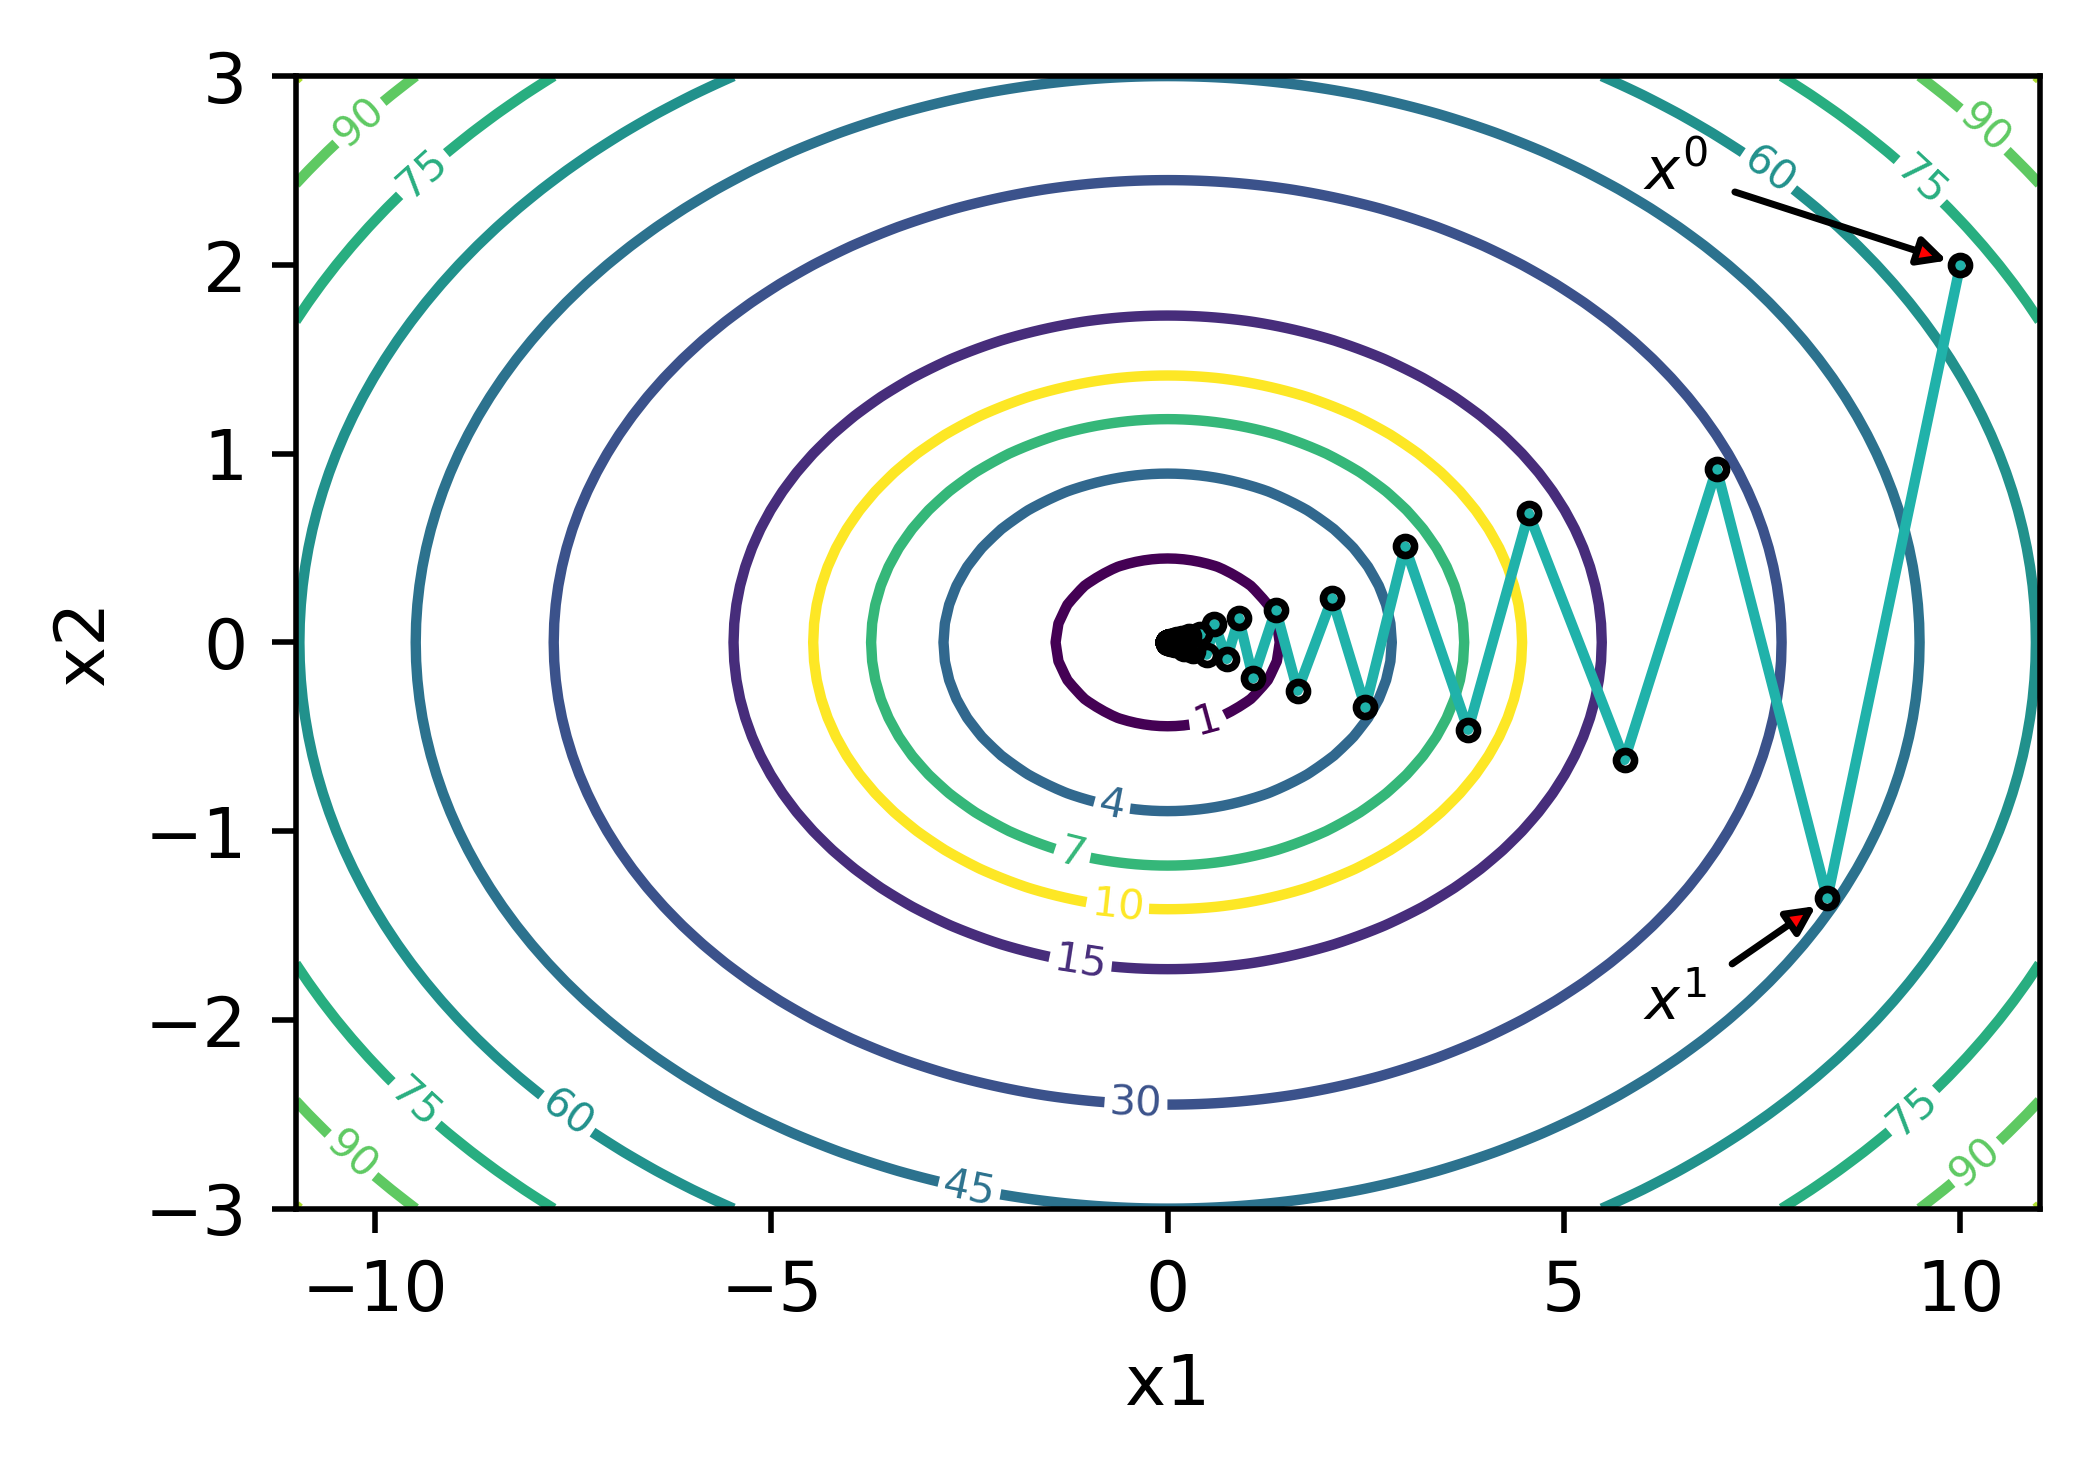

In [12]:
width_of_panel = 4.5 
height_of_panel = 3
d = 500
plt.figure(figsize=(width_of_panel, height_of_panel), dpi=d)
x1 = np.arange(-11, 11.1, 0.1)
x2 = np.arange(-3., 3.1, 0.1)
x1, x2 = np.meshgrid(x1, x2)
z = (x1**2 +10*(x2**2)) / 2

levels = [1, 4, 7, 10]
cp1 = plt.contour(x1, x2, z, levels=levels)
cp2 = plt.contour(x1, x2, z)

plt.clabel(cp1, inline=1, fontsize=6)
plt.clabel(cp2, inline=1, fontsize=6)
plt.xlabel('x1')
plt.ylabel('x2')
plt.plot(x_one(min_gd_iii(fun, [10,2], grad)), x_two(min_gd_iii(fun, [10,2], grad)), color='lightseagreen')
plt.plot(x_one(min_gd_iii(fun, [10,2], grad))[:], x_two(min_gd_iii(fun, [10,2], grad))[:], "or", markerfacecolor="None", markeredgecolor='black', markeredgewidth=1.1, markersize=2.6)
plt.annotate("$x^0$", fontsize = 8.5, xy=(10,2), xytext=(6,2.4), arrowprops=dict(arrowstyle = '-|>', connectionstyle = 'Arc3',facecolor='r'))
plt.annotate("$x^1$", fontsize = 8.5, xy=(8.322278399999998,-1.3554432000000016), xytext=(6,-2), arrowprops=dict(arrowstyle = '-|>', connectionstyle = 'Arc3',facecolor='r'))
plt.show() 